Pandas documentation: https://pandas.pydata.org/docs/user_guide/index.html#user-guide
GeoPandas documentation: https://geopandas.org/en/stable/docs.html

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [2]:
AL_places = gpd.read_file(r"C:\Users\no\Documents\School\2025-2026 school\Spring 2026\AES 408 - Python for GIS\Repository\hw2\AL_places\cb_2024_01_place_500k.shp")
#AL_places = gpd.read_file(r"C:\Users\cquering\Documents\Repository\408\hw2\AL_places\cb_2024_01_place_500k.shp")
AL_places_sorted = AL_places.sort_values(by=["NAME"]) #creating alphabetized version
AL_places_sorted_meter = AL_places_sorted.to_crs(epsg=3857) #reprojecting to WGS 1984

AL_places_bounds = pd.concat([AL_places_sorted_meter, AL_places_sorted_meter.bounds], axis=1) #adding bounds as columns on dataframe
geometry = AL_places_bounds['geometry']
minX = AL_places_bounds['minx']
maxX = AL_places_bounds['maxx']
minY = AL_places_bounds['miny']
maxY = AL_places_bounds['maxy']
name = AL_places_bounds['NAME']
print("geometry for Coffee Springs",geometry.iloc[107])
print("area for Coffee Springs ", geometry.iloc[107].area)
print("bounds for Coffee Springs ", geometry.iloc[107].bounds)
print("X-diameter of Coffee Springs is", maxX.iloc[107]-minX.iloc[107])
print("Y-diameter of Coffee Springs is", maxY.iloc[107]-minY.iloc[107])



geometry for Coffee Springs POLYGON ((-9564428.838394642 3654591.1932086144, -9564308.389471188 3654867.3954338282, -9564035.766173964 3655158.4360969686, -9563584.586083625 3655320.6783731445, -9563293.039244212 3655311.3114453848, -9562923.791574562 3655140.484428267, -9562634.80601287 3654820.6933442717, -9562561.336797742 3654167.8652693518, -9562654.17830758 3653928.234470585, -9562961.756189099 3653592.9928438175, -9563505.331795223 3653413.6015897524, -9563961.409066042 3653542.906430536, -9564319.858097503 3653917.9528446463, -9564432.178859888 3654282.213455091, -9564428.838394642 3654591.1932086144))
area for Coffee Springs  2743240.6898273085
bounds for Coffee Springs  (-9564432.178859888, 3653413.6015897524, -9562561.336797742, 3655320.6783731445)
X-diameter of Coffee Springs is 1870.8420621454716
Y-diameter of Coffee Springs is 1907.0767833921127


In [ ]:
index = 479
print(name.iloc[index])
diameterX =  maxX.iloc[index]-minX.iloc[index]
diameterY = maxY.iloc[index]-minY.iloc[index]
Diameter_difference = np.absolute(diameterX - diameterY)
circularArea = ((diameterX/2)**2)*np.pi
realArea = geometry.iloc[index].area
areaDifference = np.absolute(circularArea - realArea)
percentAreaDif = areaDifference/realArea * 100
if diameterX > diameterY:
    
print("circular area is ", percentAreaDif, "percent different from real area")
print("theoretical circular area:", circularArea, "real area:", realArea)
print("difference between theoretical and real equals:", np.absolute(circularArea-realArea))
#print("index:",index, "\nname:", name.iloc[index])

'''if diameterX > diameterY:
    percentDif = Diameter_difference/diameterY * 100
elif diameterX < diameterY:
    percentDif = Diameter_difference/diameterX * 100
else:
    print("x and y diameters are equal!")
print(percentDif)''' # I don't think this block is helpful at this moment.




Sanford
circular area is  1.774716910311818 percent different from real area
theoretical circular area: 14726145.755277224 real area: 14992215.132463379
difference between theoretical and real equals: 266069.37718615495


'if diameterX > diameterY:\n    percentDif = Diameter_difference/diameterY * 100\nelif diameterX < diameterY:\n    percentDif = Diameter_difference/diameterX * 100\nelse:\n    print("x and y diameters are equal!")\nprint(percentDif)'

In [79]:
for index, row in AL_places_bounds.iterrows():
    diameterX =  maxX.iloc[index]-minX.iloc[index]
    diameterY = maxY.iloc[index]-minY.iloc[index]
    Diameter_difference = np.absolute(diameterX - diameterY)
    Diameter_average = (diameterX + diameterY)/2
    circularArea = ((Diameter_average/2)**2)*np.pi
    realArea = geometry.iloc[index].area
    areaDifference = np.absolute(circularArea - realArea)
    percentAreaDif = areaDifference/realArea * 100
    if diameterX > diameterY:
        if Diameter_difference <= (0.05*diameterY):
            if percentAreaDif <= 3:
                print(name.iloc[index], index)
    elif diameterX < diameterY:
        if Diameter_difference <= (0.05*diameterX):
            if percentAreaDif <= 3:
                print(name.iloc[index], index)

Brantley 59
Goldville 214
Sanford 479
Coffee Springs 107
Oakman 400


<Axes: >

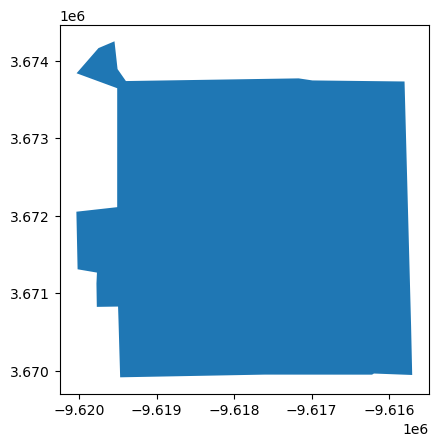

In [80]:
AL_places_bounds.iloc[[479]].plot()

In [76]:
print(name.iloc[51])

Blountsville


Found circular-ish towns that should be listed in completed code:
Brantley -          index 59
Goldville -         index 214
Coffee Springs -    index 107
Oakman -            index 400

In [6]:
for index, row in AL_places_bounds.iterrows():
    #print(row['maxx'])
    #diameterX = row['maxx'] - row['minx']
    diameterX = maxX.iloc[row]-minX.iloc[row]
    diameterY = row['maxy'] - row['miny']
    #print ("diameterX is", diameterX, "diameterY is", diameterY)
    dia_difference = diameterX - diameterY
    area = ((diameterX/2)**2)*np.pi
    difference = np.absolute(area-geometry.iloc[index].area)
    #print("difference:", difference)

    if difference <= 1000000:
        print(row['NAME'])
   # print("theoretical circular area:", area, "real area:", geometry.iloc[index].area)
   # print("difference:", np.absolute(area-geometry.iloc[index].area))
   # if np.absolute(area-geometry.iloc[index].area) <10000:
    #    print(row['NAME'])
    #if np.absolute((((diameterX/2)**2)*np.pi)-geometry.iloc[index].area) < 10000:
    #    print(row['NAME'])
    '''if diameterX > diameterY:
         if np.absolute(difference) <= (0.1 * diameterY):
            if np.absolute((((diameterX/2)**2)*np.pi)-geometry.iloc[index].area) < 10000:
                print(row['NAME'])
    elif diameterX < diameterY:
         if np.absolute(difference) <= (0.1 * diameterX):
            if np.absolute((((diameterX/2)**2)*np.pi)-geometry.iloc[index].area) < 10000:
                print(row['NAME'])
            #print(row['NAME'])
            #print(geometry.iloc[index].area)
    else: 
         print("something weird happened with", row['NAME'], "at", index)'''

ValueError: invalid literal for int() with base 10: '1600000US0100100'